In [1]:
import random
import math
import numpy as np

from math import sin, cos, acos

import copy


import sys, os, time

from qinfer import LiuWestResampler
from qinfer import utils

from qiskit import IBMQ
from qiskit import QuantumCircuit, execute, Aer


#IBMQ.load_account()

Failed to import duecredit due to No module named 'duecredit'
/home/alan/aur/miniconda3/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "
/home/alan/aur/miniconda3/lib/python3.8/site-packages/qinfer/parallel.py:61: UserWarning: Could not import IPython parallel. Parallelization support will be disabled.
  warnings.warn(


In [2]:
import matplotlib.pyplot as plt
import seaborn as sbs

import smc_unitary as smc
Distribution = smc.Distribution

sbs.set(style="darkgrid")

%matplotlib inline

In [58]:
x = Distribution(n_points=2000, n_qubits=1)
for i in range(10):
    state = [0, np.pi][np.random.randint(2)]
    x.measure([state // np.pi], [state, np.random.uniform(2 * np.pi)])
    if i % 10:
        print(x.calc_bayes_risk())
# print(x.n_eff())
# print(x.calc_bayes_mean())

6.232738142407076
6.0729488093245605
6.179972676007153
6.224730465277455
6.276265265766349
6.334168596404845
6.181698136204614
6.216750915999362
6.137863756704532


In [43]:
max(zip(x.weights, x.points))

(0.0832765617338285, array([1.23552038, 1.03866924]))

In [26]:
?list.sort

In [62]:
x.calc_bayes_mean()

array([3.12202841, 3.14510493])

In [68]:
cm(x)

[3.12202841 3.14510493]
3.122028410754877
[1.5554283  3.07029459]


array([1.5554283 , 3.07029459])

In [67]:
def cm(dist, acc=0.1, count=None):
    
    if count == None:
        count = 2 * dist.n_qubits
    
    if count == 0:
        return 
    
    mean = dist.calc_bayes_mean()
    print(mean)
    bounds = dist.calc_bayes_risk() * acc
    
    highest_points = list(zip(dist.weights, dist.points))
    highest_points.sort(reverse=True)
    highest_points = highest_points[:int(len(highest_points) * acc)]
    
    
    for i, val in enumerate(mean):
        in_range = False
        
        while not in_range:
            for j in highest_points:
                if abs(val - j[1][i]) < bounds:
                    in_range = True
                    break
                    
            if not in_range:
                
                # Split distribution
                
                new_points = [[], []]
                new_weights = [[], []]
                print(val)
                for j in zip(dist.weights, dist.points):
                    if j[1][i] <= val:
                        new_weights[0].append(copy.deepcopy(j[0]))
                        new_points[0].append(copy.deepcopy(j[1]))
                    else:
                        new_weights[1].append(copy.deepcopy(j[0]))
                        new_points[1].append(copy.deepcopy(j[1]))
                             
                if sum(new_weights[0]) > sum(new_weights[1]):
                    target = 0
                else:
                    target = 1
                
                new_points = new_points[target]
                new_weights = new_weights[target]
                
                sub_dist = Distribution(n_points=len(new_weights), n_qubits=dist.n_qubits)
                
                sub_dist.points = new_points
                sub_dist.weights = new_weights
                sub_dist.renormalise()
                
                return cm(sub_dist, count - 1)
        
    return mean
                

In [ ]:
for i in highest_point:
    

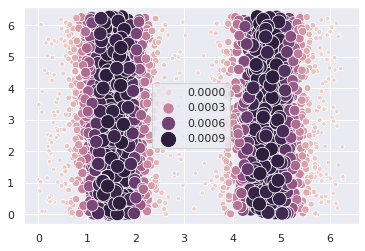

In [69]:
sbs.scatterplot(x.points[:,0],
                x.points[:,1],
                size=x.weights,
                sizes=(20, 200),
                hue=x.weights)

In [4]:
def great_circle_distance(point_a, point_b):
    return acos(sin(point_a[1]) * sin(point_b[1]) + cos(point_a[1]) * cos(point_b[1] * cos(point_a[0] - point_b[0])))

In [5]:
def fake_experiment(true_bias, operation):
    result = []
    p_correct = 1 - great_circle_distance(true_bias, operation) / (np.pi)
        
    for _ in range(len(true_bias) // 2):
        outcome = 1 if random.random() < p_correct else 0
        result.append(outcome)
    return result

In [7]:
true_bias = [np.random.uniform(2 * np.pi), np.random.uniform(2 * np.pi)]

dist = Distribution(n_points=2000, n_qubits=1)
for _ in range(200):
    
    #operation = dist.next_experiment()
#     print(operation)
#     print(x.n_eff())
    operation = [np.random.random(), np.random.random()]
    state = fake_experiment(true_bias, operation)
    state = np.array(state)
    dist.measure([state / np.pi], [state, np.random.uniform(2 * np.pi)])

print(dist.calc_bayes_mean())
print(true_bias)

[1.3274259  1.95005678]
[5.735346387508524, 4.97495886458644]


In [70]:
sbs.scatterplot(dist.points[:,0],
                dist.points[:,1],
                size=dist.weights,
                sizes=(20, 200),
                hue=dist.weights)

NameError: name 'dist' is not defined

In [ ]:
# Try on IBMQ